In [11]:
import pandas as pd
import numpy as np
import iexfinance
from iexfinance.stocks import get_historical_data
from datetime import datetime, date

In [12]:
#pip install iexfinance

In [51]:
price_df=pd.read_csv("static/data/BBG_price_data.csv")
price_df

,Date,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle
0,1/4/2010,418.50,557.75,1049.50,76.00,85.375
1,1/5/2010,418.75,553.00,1052.25,73.12,86.325
2,1/6/2010,421.75,567.25,1050.50,73.55,85.950
3,1/7/2010,417.50,557.75,1017.75,72.89,85.925
4,1/8/2010,423.00,568.50,1013.00,72.44,85.825
...,...,...,...,...,...,...
2896,7/2/2021,697.25,645.75,1451.75,86.03,122.000
2897,7/6/2021,656.00,620.00,1363.75,86.38,122.400
2898,7/7/2021,652.50,614.75,1386.50,86.63,120.600
2899,7/8/2021,638.00,612.25,1390.25,85.88,119.275


In [52]:
price_df.dtypes

Date              object
Corn Price       float64
Wheat Price      float64
Soybean Price    float64
Cotton Price     float64
Live Cattle      float64
dtype: object

In [53]:
price_df["Date"]=pd.to_datetime(price_df.Date,format='%m/%d/%Y')


In [54]:
price_df.dtypes

Date             datetime64[ns]
Corn Price              float64
Wheat Price             float64
Soybean Price           float64
Cotton Price            float64
Live Cattle             float64
dtype: object

In [55]:
price_df

,Date,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle
0,2010-01-04,418.50,557.75,1049.50,76.00,85.375
1,2010-01-05,418.75,553.00,1052.25,73.12,86.325
2,2010-01-06,421.75,567.25,1050.50,73.55,85.950
3,2010-01-07,417.50,557.75,1017.75,72.89,85.925
4,2010-01-08,423.00,568.50,1013.00,72.44,85.825
...,...,...,...,...,...,...
2896,2021-07-02,697.25,645.75,1451.75,86.03,122.000
2897,2021-07-06,656.00,620.00,1363.75,86.38,122.400
2898,2021-07-07,652.50,614.75,1386.50,86.63,120.600
2899,2021-07-08,638.00,612.25,1390.25,85.88,119.275


Text(0.5, 1.0, 'Corn Price')

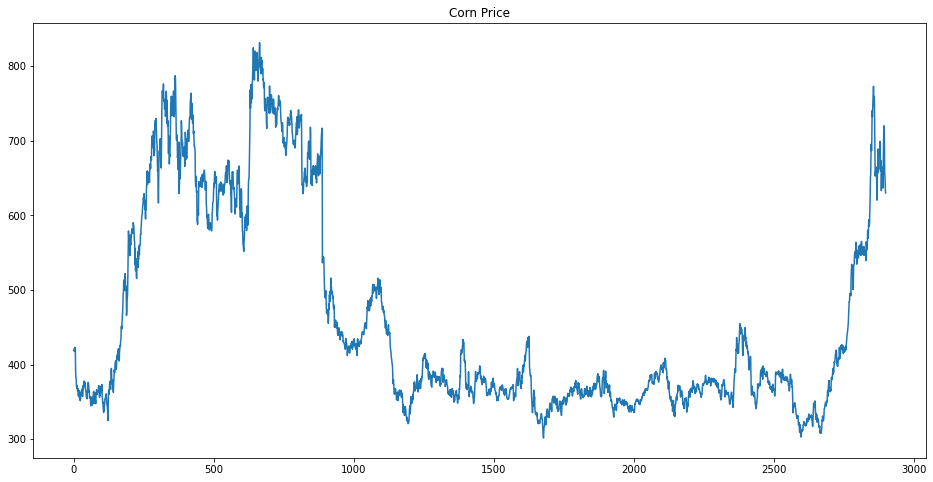

In [56]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Corn Price"],label='Close Price history')
plt.title("Corn Price")

Text(0.5, 1.0, 'Wheat Price')

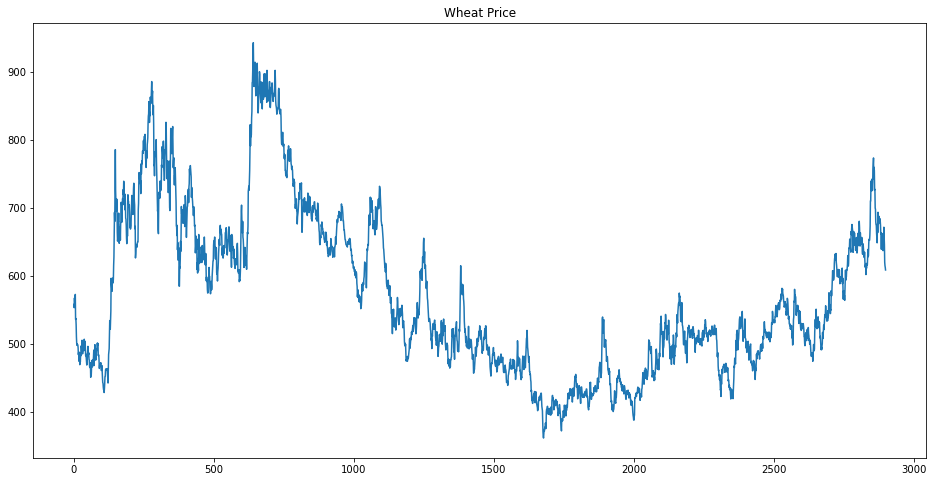

In [57]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Wheat Price"],label='Close Price history')
plt.title("Wheat Price")

Text(0.5, 1.0, 'Soybean Price')

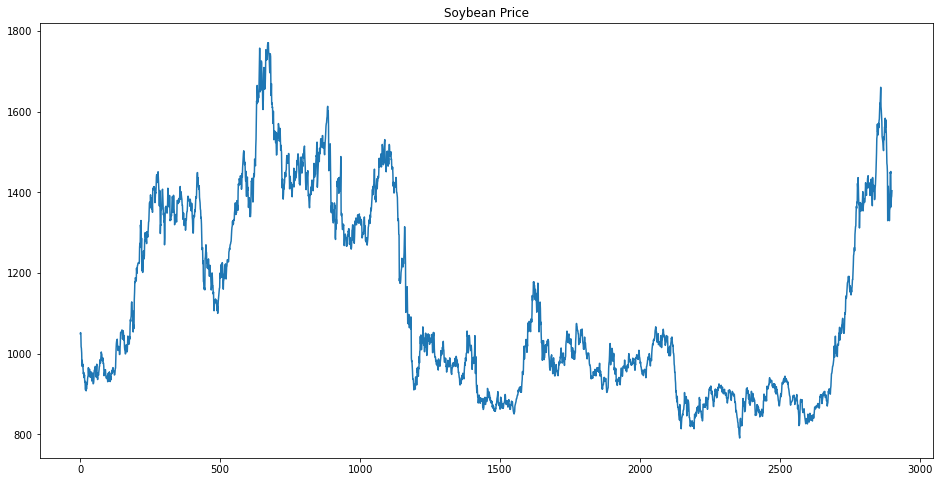

In [58]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Soybean Price"],label='Close Price history')
plt.title("Soybean Price")

Text(0.5, 1.0, 'Cotton Price')

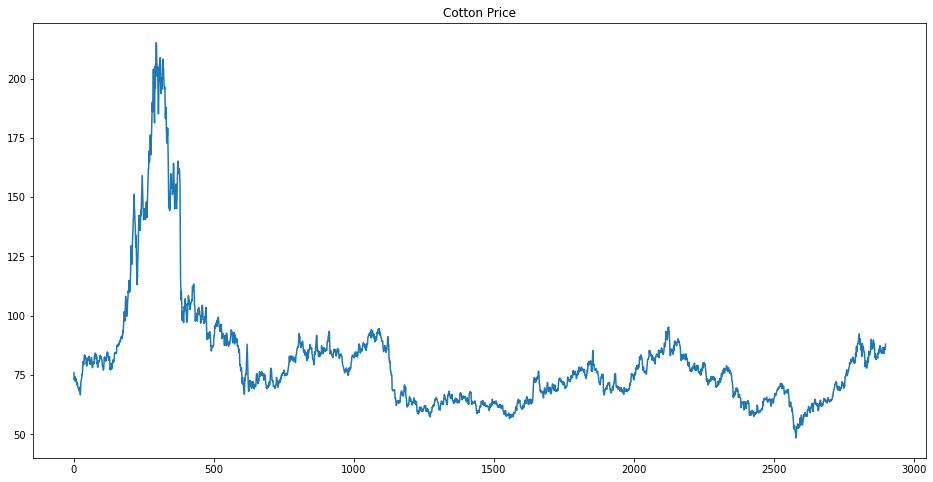

In [59]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Cotton Price"],label='Close Price history')
plt.title("Cotton Price")

Text(0.5, 1.0, 'Live Cattle Price')

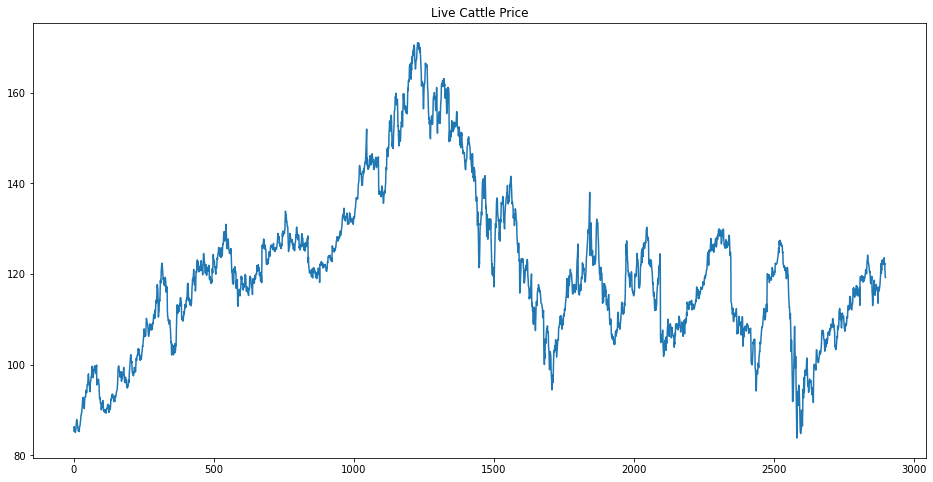

In [60]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Live Cattle"],label='Close Price history')
plt.title("Live Cattle Price")

In [91]:
corn_df= price_df.drop(columns=['Soybean Price','Wheat Price','Cotton Price', 'Live Cattle'])
corn_df["Corn Price Lag"]= corn_df['Corn Price'].shift(2)
corn_df.dropna(inplace=True)
corn_df

,Date,Corn Price,Corn Price Lag
2,2010-01-06,421.75,418.50
3,2010-01-07,417.50,418.75
4,2010-01-08,423.00,421.75
5,2010-01-11,422.50,417.50
6,2010-01-12,392.50,423.00
...,...,...,...
2896,2021-07-02,697.25,720.00
2897,2021-07-06,656.00,719.75
2898,2021-07-07,652.50,697.25
2899,2021-07-08,638.00,656.00


In [98]:
from sklearn.model_selection import train_test_split


In [92]:
corn_dataset = corn_df.values
X = corn_dataset[:,2].reshape(-1,1)
Y = corn_dataset[:,1:2]
print(X)
print(Y)

[[418.5]
 [418.75]
 [421.75]
 ...
 [697.25]
 [656.0]
 [652.5]]
[[421.75]
 [417.5]
 [423.0]
 ...
 [652.5]
 [638.0]
 [629.75]]


In [96]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=0.33, random_state=1)

In [ ]:
#test models option

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [80]:
# wheat_df= price_df.drop(columns=['Soybean Price','Corn Price','Cotton Price', 'Live Cattle'])
# wheat_df

In [81]:
# soy_df= price_df.drop(columns=['Corn Price','Wheat Price','Cotton Price', 'Live Cattle'])
# soy_df

In [82]:
# cotton_df= price_df.drop(columns=['Soybean Price','Wheat Price','Corn Price', 'Live Cattle'])
# cotton_df

In [83]:
# cattle_df= price_df.drop(columns=['Soybean Price','Wheat Price','Cotton Price', 'Corn Price'])
# cattle_df

In [125]:
# Using sklearn
from sklearn.metrics import r2_score
print (r2_score(Y, predictions))

0.9907610507624761


178.22934891990516


Text(0.5, 1.0, 'Price Forecast Based on Previous Price')

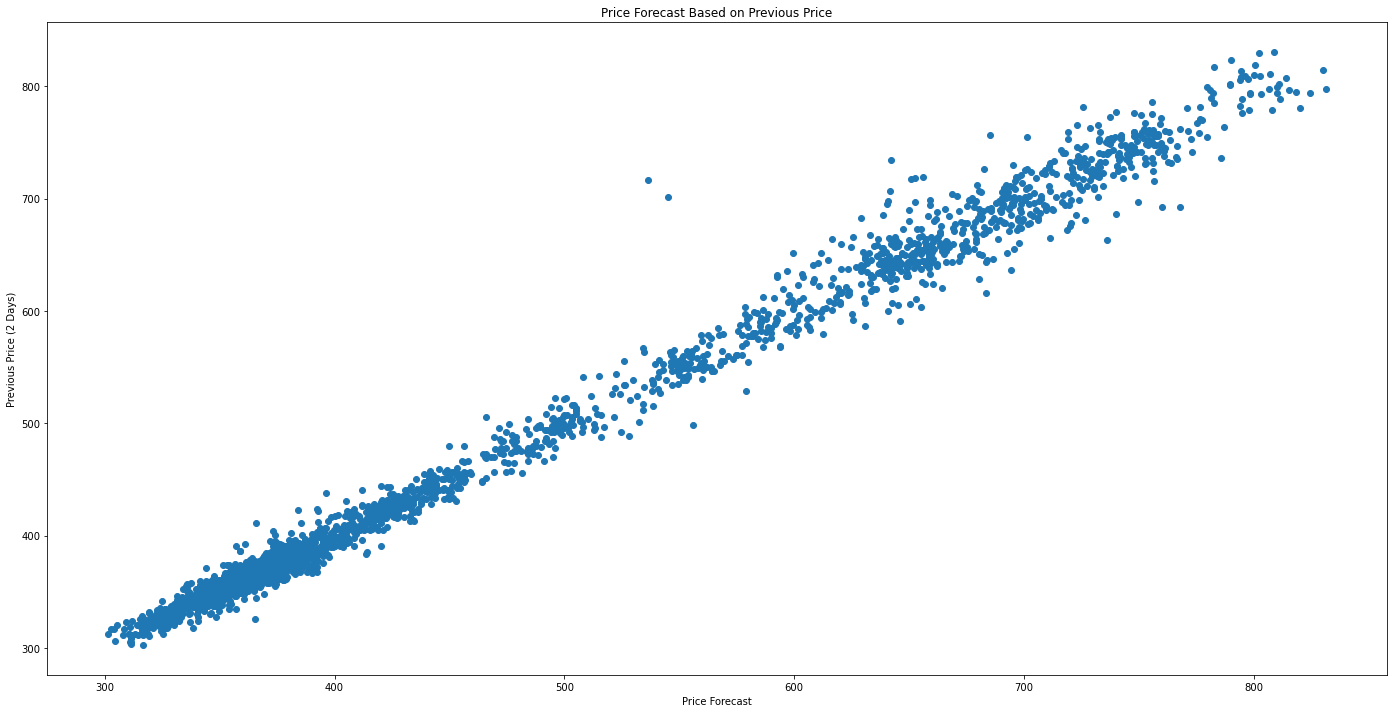

In [123]:
model = LinearRegression()
# Fit to model
model.fit(X_train, Y_train)
# predict
predictions = model.predict(X)
print(mean_squared_error(Y, predictions))

# %matplotlib inline 
fig= plt.figure(figsize=(24,12))

plt.scatter(Y,predictions)
plt.xlabel("Price Forecast")
plt.ylabel("Previous Price (2 Days)")
plt.title("Price Forecast Based on Previous Price")
